In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
# !pip install vaderSentiment
# !pip install afinn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import nltk
from collections import Counter
df = pd.read_csv("/content/data.csv")
# df=df.drop('Unnamed',axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          1000 non-null   int64  
 1   Age             1000 non-null   int64  
 2   Gender          1000 non-null   object 
 3   VRHeadset       1000 non-null   object 
 4   Duration        1000 non-null   float64
 5   MotionSickness  1000 non-null   int64  
 6   ImmersionLevel  1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [4]:
df.head()

UserID  Age  Gender       VRHeadset   Duration  MotionSickness  \
0       1   40    Male        HTC Vive  13.598508               8   
1       2   43  Female        HTC Vive  19.950815               2   
2       3   27    Male  PlayStation VR  16.543387               4   
3       4   33    Male        HTC Vive  42.574083               6   
4       5   51    Male  PlayStation VR  22.452647               4   

   ImmersionLevel  
0               5  
1               2  
2               2  
3               3  
4               2

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['VRHeadset']=le.fit_transform(df['VRHeadset'])

In [6]:
df['ImmersionLevel'].value_counts()

2    208
4    206
1    202
3    193
5    191
Name: ImmersionLevel, dtype: int64

# Data analysis

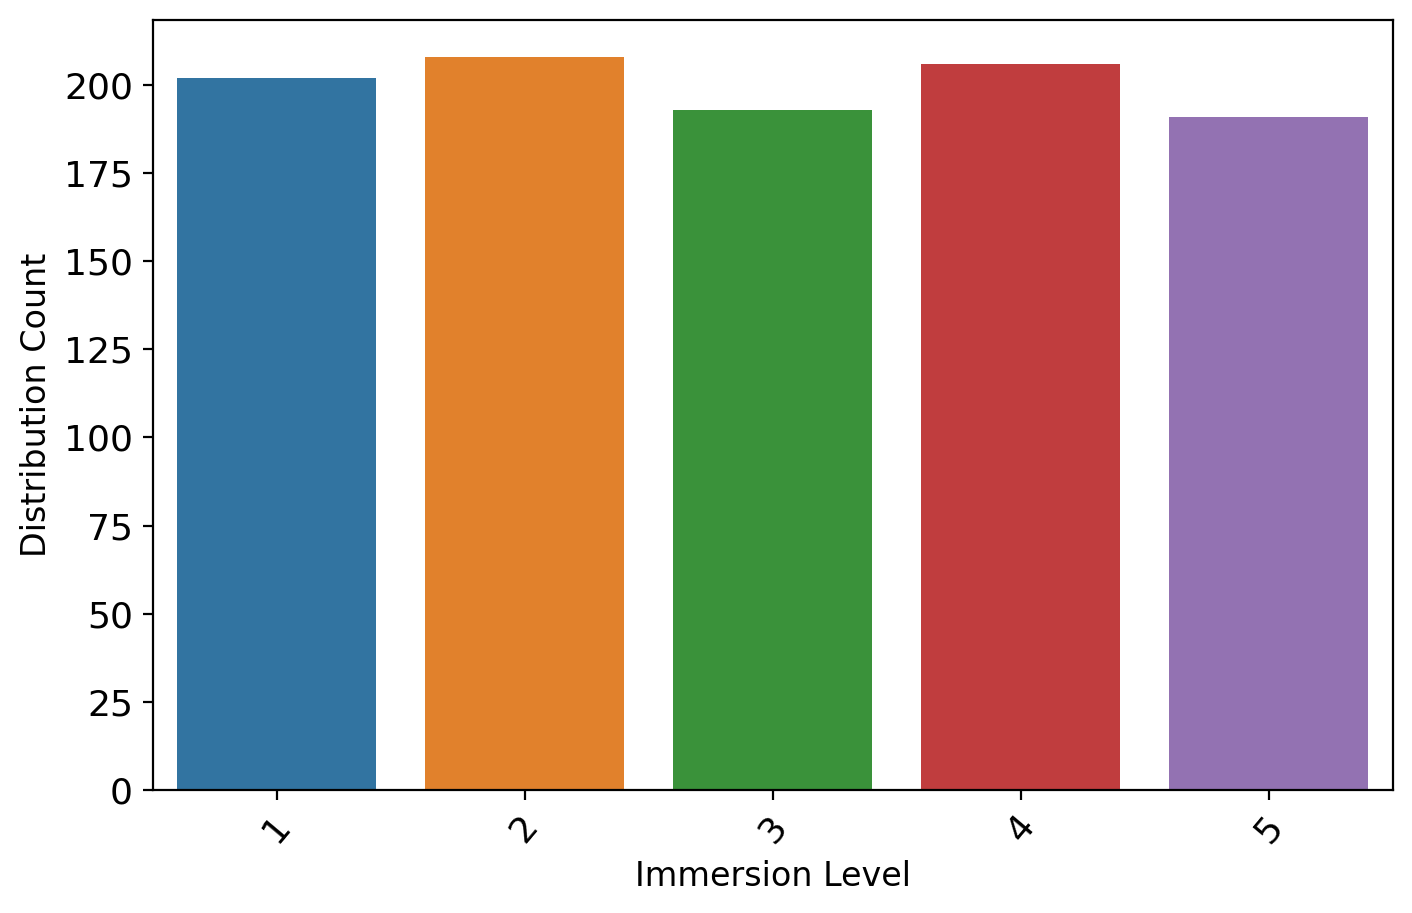

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter
plt.figure(figsize=(8,5), dpi = 200)
p=sns.countplot(x='ImmersionLevel',data= df )
p.yaxis.set_major_formatter(y_format)
p.tick_params(labelsize=13)
plt.xticks(rotation = 50)
plt.xlabel("Immersion Level",fontsize=12)
plt.ylabel("Distribution Count",fontsize=12)
# plt.savefig('barchart.pdf',dpi=100,bbox_inches = 'tight')
plt.show()

In [7]:
x=df.drop(['ImmersionLevel'],axis=1)
y=df['ImmersionLevel']
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=0,shuffle=True)

# results with origional features

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='auto',C=1.0)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

Training time: 0.2122478485107422s
accuracy score 0.2
              precision    recall  f1-score   support

           1       0.24      0.41      0.30        37
           2       0.19      0.28      0.23        39
           3       0.10      0.11      0.11        35
           4       0.25      0.21      0.23        48
           5       0.00      0.00      0.00        41

    accuracy                           0.20       200
   macro avg       0.16      0.20      0.17       200
weighted avg       0.16      0.20      0.17       200

0.2070 accuracy with a standard deviation of 0.0195


In [13]:
from sklearn.svm import LinearSVC
print("SVC")
clf = LinearSVC(random_state=0,max_iter=500)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LinearSVC(random_state=0,max_iter=500)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

SVC
Training time: 0.11833071708679199s
accuracy score 0.225
              precision    recall  f1-score   support

           1       0.50      0.03      0.05        37
           2       0.19      0.13      0.15        39
           3       0.00      0.00      0.00        35
           4       0.26      0.73      0.38        48
           5       0.12      0.10      0.11        41

    accuracy                           0.23       200
   macro avg       0.21      0.20      0.14       200
weighted avg       0.21      0.23      0.15       200

0.2300 accuracy with a standard deviation of 0.0332


In [14]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=100,max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(n_estimators=100,max_depth=100, random_state=0)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

RF
Training time: 0.6832747459411621s
accuracy score 0.16
              precision    recall  f1-score   support

           1       0.14      0.14      0.14        37
           2       0.13      0.18      0.15        39
           3       0.22      0.20      0.21        35
           4       0.14      0.12      0.13        48
           5       0.20      0.17      0.18        41

    accuracy                           0.16       200
   macro avg       0.17      0.16      0.16       200
weighted avg       0.16      0.16      0.16       200

0.1990 accuracy with a standard deviation of 0.0226


# Results with PCA

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)

In [20]:

X_train, X_test, Y_train, Y_test = train_test_split(x_pca,y, test_size = 0.2,random_state=0,shuffle=True)

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=100,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='auto',C=1.0)
score = cross_val_score(clf, x_pca, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

Training time: 0.12718510627746582s
accuracy score 0.2
              precision    recall  f1-score   support

           1       0.27      0.35      0.31        37
           2       0.16      0.26      0.20        39
           3       0.17      0.20      0.18        35
           4       0.21      0.21      0.21        48
           5       0.00      0.00      0.00        41

    accuracy                           0.20       200
   macro avg       0.16      0.20      0.18       200
weighted avg       0.16      0.20      0.18       200

0.2120 accuracy with a standard deviation of 0.0477


In [25]:
from sklearn.svm import LinearSVC
print("SVC")
clf = LinearSVC(random_state=0,max_iter=500)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LinearSVC(random_state=0,max_iter=500)
score = cross_val_score(clf, x_pca, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

SVC
Training time: 0.09511661529541016s
accuracy score 0.21
              precision    recall  f1-score   support

           1       0.21      0.51      0.29        37
           2       0.14      0.10      0.12        39
           3       0.23      0.43      0.30        35
           4       0.30      0.06      0.10        48
           5       0.20      0.02      0.04        41

    accuracy                           0.21       200
   macro avg       0.22      0.23      0.17       200
weighted avg       0.22      0.21      0.16       200

0.1980 accuracy with a standard deviation of 0.0451


In [26]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=100,max_depth=100, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
# print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(n_estimators=100,max_depth=100, random_state=0)
score = cross_val_score(clf, x_pca, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
# cf_matrix=confusion_matrix(Y_test,dtP3)
# cf_matrix

RF
Training time: 0.44127869606018066s
accuracy score 0.225
              precision    recall  f1-score   support

           1       0.23      0.27      0.25        37
           2       0.21      0.23      0.22        39
           3       0.22      0.26      0.24        35
           4       0.26      0.25      0.26        48
           5       0.18      0.12      0.14        41

    accuracy                           0.23       200
   macro avg       0.22      0.23      0.22       200
weighted avg       0.22      0.23      0.22       200

0.1930 accuracy with a standard deviation of 0.0492


# Transfer learning

In [8]:
x=df.drop(['ImmersionLevel'],axis=1)
y=df['ImmersionLevel']

In [54]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
poly = PolynomialFeatures(degree=1,include_bias=False)
X_train_poly = poly.fit_transform(x)
pl=pd.DataFrame(X_train_poly)

from sklearn.ensemble import RandomForestClassifier
print("RF")
RF=RandomForestClassifier(n_estimators=20,max_depth=12, random_state=0)
rfPre1=RF.fit(x, y).predict_proba(x)
rf=pd.DataFrame(rfPre1)

result = pd.concat([pl,rf], axis=1).reindex(pl.index)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(result,y,test_size = 0.2,random_state=0,shuffle=True)

RF


In [ ]:
result.to_csv('hybridfeatureselpsy-up.csv',index=False)
# df1=pd.read_csv('/content/hybridfeatureselpsy.csv')
# # x=df.drop(['y'],axis=1)
# y=df['y']
# X_train, X_test, Y_train, Y_test = train_test_split(df1,y, test_size = 0.2,random_state=0,shuffle=True)

## ML

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LogisticRegression(random_state=0,max_iter=500,multi_class='auto',C=1.0)
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.3015613555908203s
accuracy score 0.975
error rate: 0.025000000000000022
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      0.92      0.96        39
           3       0.92      1.00      0.96        35
           4       0.98      0.98      0.98        48
           5       0.98      0.98      0.98        41

    accuracy                           0.97       200
   macro avg       0.98      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

0.9700 accuracy with a standard deviation of 0.0214


array([[37,  0,  0,  0,  0],
       [ 0, 36,  2,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 0,  0,  1,  0, 40]])

In [20]:
from sklearn.svm import LinearSVC
print("SVC")
clf = LinearSVC(random_state=0,max_iter=1000)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LinearSVC(random_state=0,max_iter=1000)
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

SVC
Training time: 0.2347567081451416s
accuracy score 0.255
error rate: 0.745
              precision    recall  f1-score   support

           1       1.00      0.16      0.28        37
           2       0.21      1.00      0.34        39
           3       1.00      0.06      0.11        35
           4       1.00      0.08      0.15        48
           5       0.00      0.00      0.00        41

    accuracy                           0.26       200
   macro avg       0.64      0.26      0.18       200
weighted avg       0.64      0.26      0.17       200

0.6440 accuracy with a standard deviation of 0.1796


array([[ 6, 31,  0,  0,  0],
       [ 0, 39,  0,  0,  0],
       [ 0, 33,  2,  0,  0],
       [ 0, 44,  0,  4,  0],
       [ 0, 41,  0,  0,  0]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=300,max_depth=300, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(n_estimators=300,max_depth=300, random_state=0)
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 1.0338032245635986s
accuracy score 0.985
error rate: 0.015000000000000013
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.97        39
           3       0.97      1.00      0.99        35
           4       0.98      0.98      0.98        48
           5       0.98      1.00      0.99        41

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.98       200

0.9790 accuracy with a standard deviation of 0.0130


array([[37,  0,  0,  0,  0],
       [ 0, 37,  1,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 0,  0,  0,  0, 41]])

In [30]:
array1=[[37,  0,  0,  0,  0],
       [ 0, 36,  2,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 0,  0,  1,  0, 40]]

array2=[[37,  0,  0,  0,  0],
       [ 0, 37,  1,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 0,  0,  0,  0, 41]]

array3=[[ 6, 31,  0,  0,  0],
       [ 0, 39,  0,  0,  0],
       [ 0, 33,  2,  0,  0],
       [ 0, 44,  0,  4,  0],
       [ 0, 41,  0,  0,  0]]

array4=[[36,  1,  0,  0,  0],
       [ 1, 36,  1,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 4,  0,  0,  2, 35]]


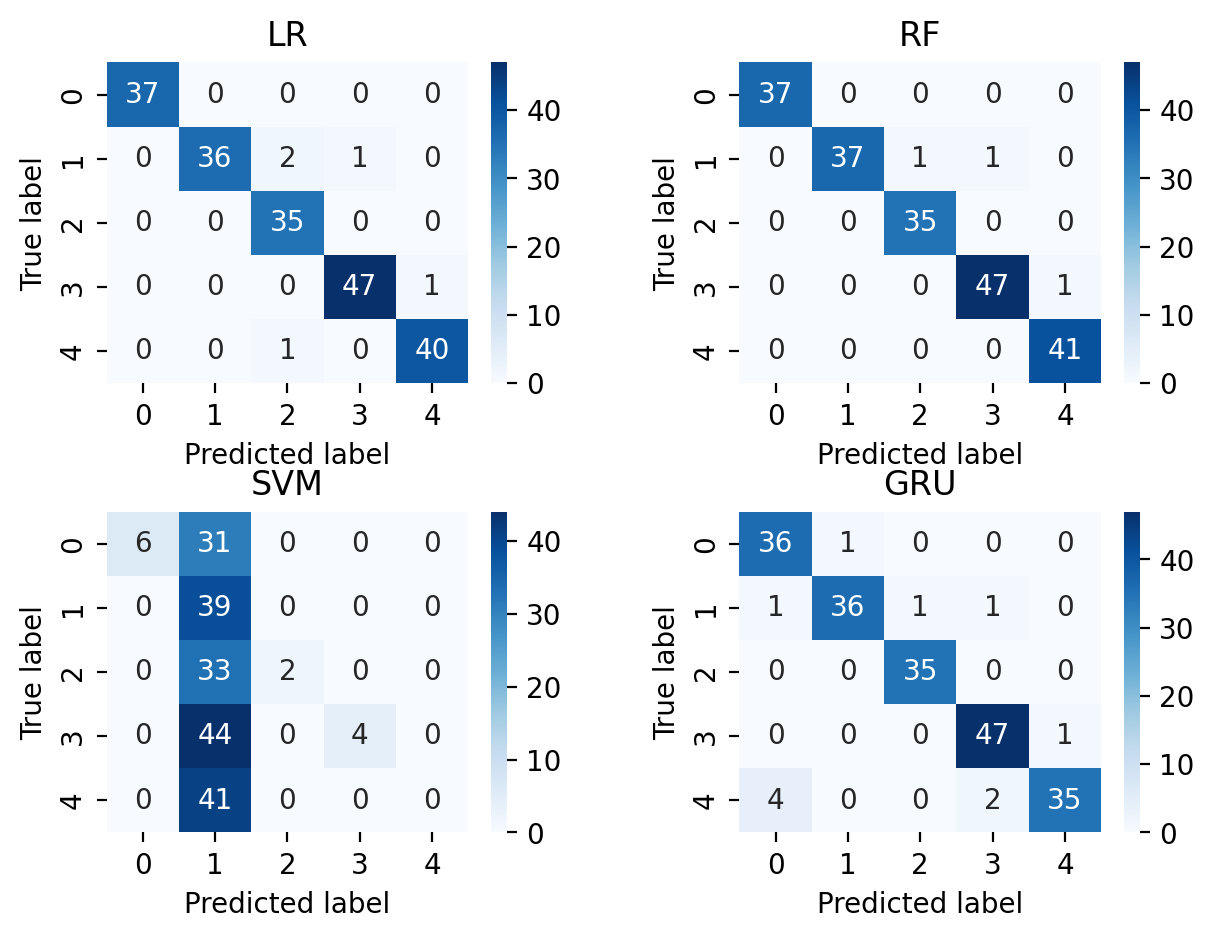

In [36]:
# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 5),dpi=200)

# Set title for the whole figure
# fig.suptitle('Confusion matrices', fontsize=16)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4]
titles = ['LR'  ,'RF',   'SVM',  'GRU',]

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the figure
plt.savefig('froncm.pdf')
plt.show()

## GRU

In [26]:
result = pd.concat([pl,rf], axis=1).reindex(pl.index)
from sklearn.model_selection import train_test_split
df['ImmersionLevel'] = df['ImmersionLevel'].map({1:0,
                 2: 1,
                 3: 2,
                 4:3,
                 5:4})
y=df['ImmersionLevel']
X_train, X_test, Y_train, Y_test = train_test_split(result,y,test_size = 0.2,random_state=0,shuffle=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 15,109
Trainable params: 15,109
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
23/23 [==============================] - 4s 24ms/step - loss: 1.6065 - accuracy: 0.2139 - val_loss: 1.6142 - val_accuracy: 0.1625
Epoch 2/10
23/23 [==================

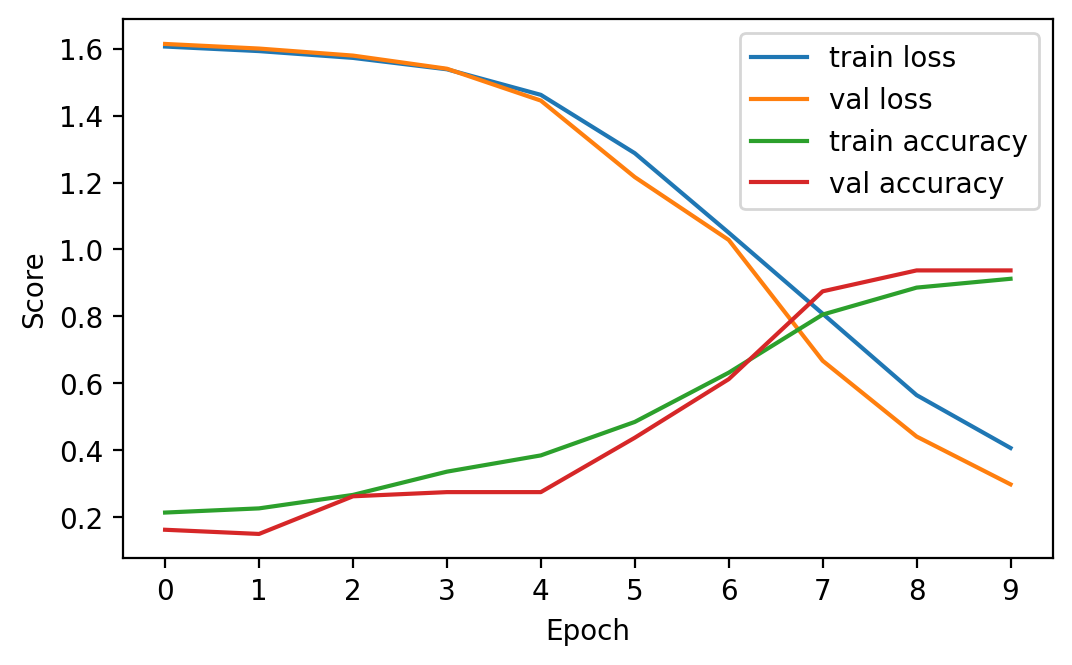

7/7 [==============================] - 0s 3ms/step
accuracy score 0.945
error rate: 0.05500000000000005
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        37
           1       0.97      0.92      0.95        39
           2       0.97      1.00      0.99        35
           3       0.94      0.98      0.96        48
           4       0.97      0.85      0.91        41

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



array([[36,  1,  0,  0,  0],
       [ 1, 36,  1,  1,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 47,  1],
       [ 4,  0,  0,  2, 35]])

In [28]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout
# Build the LSTM model
model = Sequential()
model.add(GRU(64, input_shape= (X_train.shape[1], 1)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=5), validation_split=0.1, epochs=10)
stop = time.time()
print(f"Training time: {stop - start}s")

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 3.5), dpi = 200)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.show()

scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
cf_matrix=confusion_matrix(Y_test,scores.argmax(axis=1))
cf_matrix

In [29]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
  model = Sequential()
  model.add(GRU(64, input_shape= (X_train.shape[1], 1)))
  model.add(Dense(32,activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(5,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
  return model

estimator = KerasClassifier(
    build_fn=create_model,
    epochs = 10,
    verbose=1
)
cv_scores = cross_val_score(estimator,
                            result,to_categorical(y, num_classes=5),
                            cv=10
                           )
# cv_scores.mean()
print("%0.4f accuracy with a standard deviation of %0.4f" % (cv_scores.mean(), cv_scores.std()))

Epoch 1/10
29/29 [==============================] - 3s 6ms/step - loss: 1.6042 - accuracy: 0.2322
Epoch 2/10
29/29 [==============================] - 0s 5ms/step - loss: 1.5889 - accuracy: 0.3422
Epoch 3/10
29/29 [==============================] - 0s 6ms/step - loss: 1.5625 - accuracy: 0.3367
Epoch 4/10
29/29 [==============================] - 0s 6ms/step - loss: 1.5005 - accuracy: 0.4589
Epoch 5/10
29/29 [==============================] - 0s 6ms/step - loss: 1.3441 - accuracy: 0.5556
Epoch 6/10
29/29 [==============================] - 0s 6ms/step - loss: 1.0094 - accuracy: 0.6656
Epoch 7/10
29/29 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.7822
Epoch 8/10
29/29 [==============================] - 0s 6ms/step - loss: 0.5092 - accuracy: 0.8444
Epoch 9/10
29/29 [==============================] - 0s 7ms/step - loss: 0.3711 - accuracy: 0.9000
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.9100
Epoch 1/10
29/29 [===

# Explainable AI

In [37]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.8 MB/s eta 0:00:00


In [40]:
result.columns = ['f1', 'f2', 'f3','f4','f5','f6', 'f7', 'f8','f9','f10','f11']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(result,y, test_size = 0.2,random_state=0,shuffle=True)

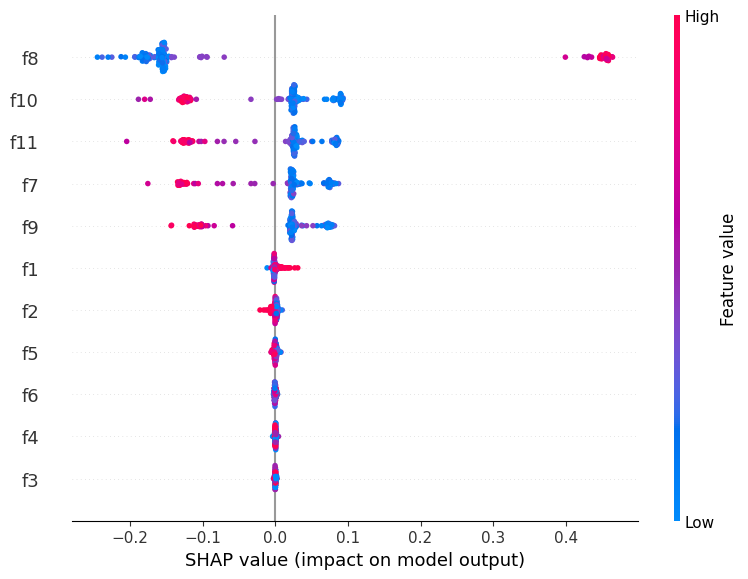

In [42]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap



rf = RandomForestClassifier(n_estimators=300,max_depth=300, random_state=0)
rf.fit(X_train, Y_train)


# # calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# visualize feature importance using SHAP summary plot
shap.summary_plot(shap_values[1], X_test)

# shap.initjs()
# shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)